In [1]:
#imported necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import pairwise_distances


In [2]:
# Load the preprocessed dataset 
df = pd.read_csv(r"..\API\data\raw\train_data.csv")

print(df.info())  
print(df.describe()) 
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [3]:
print("\nDistribution of classes:")
class_counts = df['class'].value_counts()
print(class_counts)
print(f"Class Balance: {class_counts.values[0]/class_counts.values[1]:.2f}:1")


Distribution of classes:
class
normal     13449
anomaly    11743
Name: count, dtype: int64
Class Balance: 1.15:1


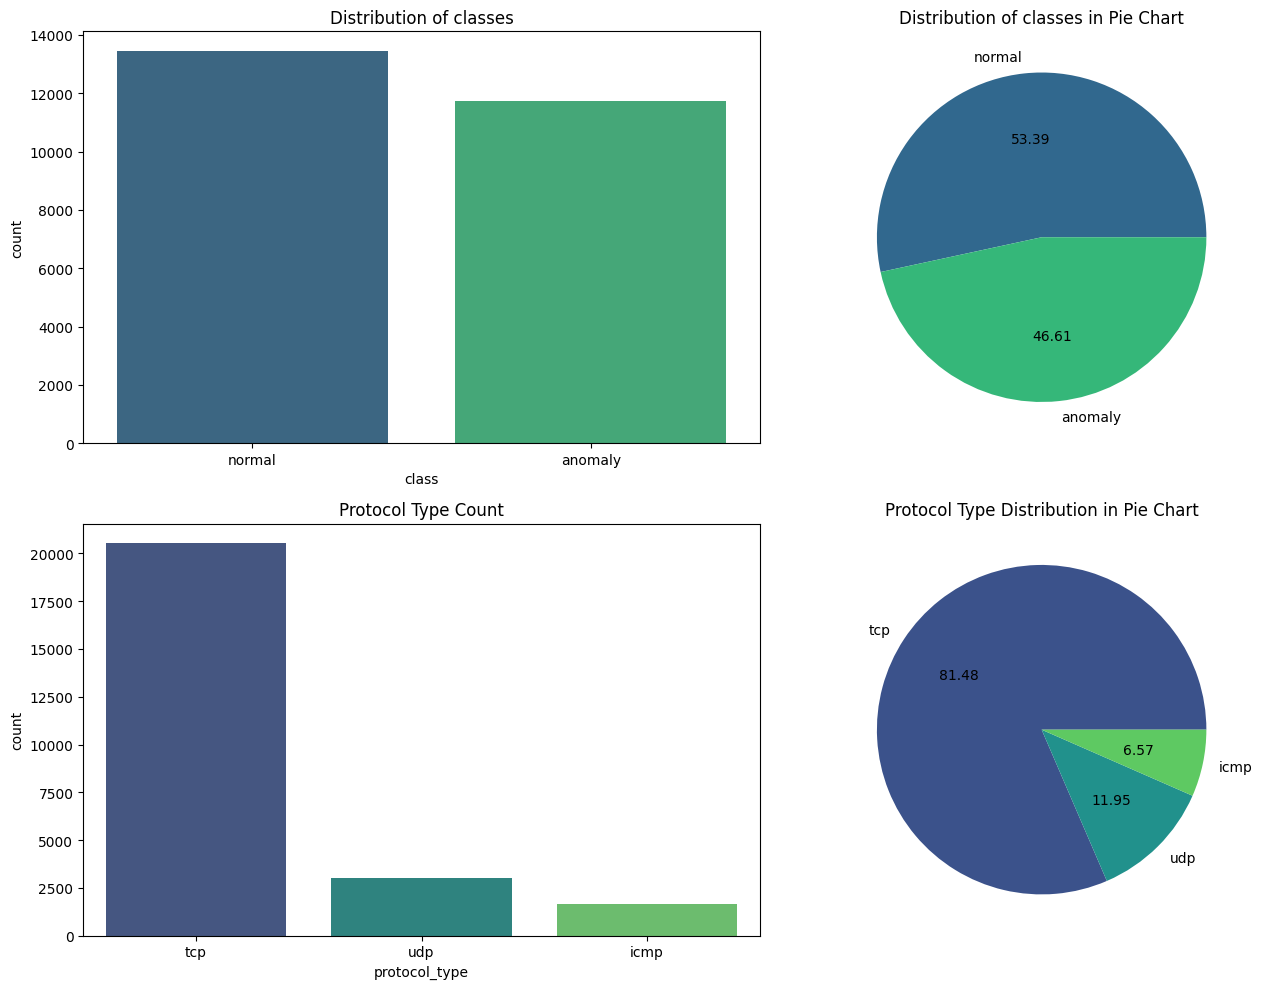

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Create a 2x2 grid 


palette = "viridis"

# Pie chart of class distribution
label = df['class'].value_counts().index
color = sns.color_palette(palette, n_colors=2)
axes[0, 1].pie(df['class'].value_counts(), labels=label, autopct="%0.2f", colors=color)
axes[0, 1].set_title("Distribution of classes in Pie Chart")

#Bar chart of class distribution
sns.countplot(ax=axes[0, 0], x=df['class'], hue=df['class'], palette=palette, legend=False)
axes[0, 0].set_title("Distribution of classes")

#Pie chart of protocol type
label=df['protocol_type'].value_counts().index
color = sns.color_palette(palette, n_colors=3)
axes[1, 1].pie(df['protocol_type'].value_counts(),labels = label , autopct="%0.2f", colors=color)
axes[1, 1].set_title("Protocol Type Distribution in Pie Chart")

#Bar chart of protocol type
sns.countplot(ax=axes[1, 0], x=df['protocol_type'], hue=df['protocol_type'], palette=palette, legend=False)
axes[1, 0].set_title("Protocol Type Count")

plt.tight_layout()
plt.show()
